In [1]:
import pandas as pd

data = pd.read_csv("train.csv")

data.head(10)

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,pcnm9,pcnm10,pcnm11,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod,kwh
0,97595,0.425,0.083,0.083,0.437,0.631,1.000,2012,0.003,0.0,...,0.599,0.553,0.390,0.828,0.562,0.485,0.612,0.0,0.189,0.0
1,97606,0.250,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.867,0.000,0.086,0.990,0.841,0.606,0.616,0.0,0.200,0.0
2,97637,0.350,0.375,0.000,0.439,0.626,0.000,2012,0.003,0.0,...,0.072,0.432,0.257,0.884,0.597,0.539,0.614,0.0,0.158,0.0
3,97646,0.325,0.292,0.167,0.440,0.612,0.250,2012,0.003,0.0,...,1.000,1.000,0.252,0.787,1.000,0.432,0.620,0.0,0.204,0.0
4,97772,0.000,0.000,0.333,0.436,0.626,0.719,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,0.614,0.0,0.199,0.0
5,104492,0.375,0.417,0.000,0.552,0.154,0.125,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,1.000,0.0,0.198,0.0
6,104528,0.400,0.458,0.000,0.553,0.160,0.125,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,0.150,0.0,0.198,0.0
7,104601,0.125,0.167,0.167,0.415,0.691,0.000,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,0.570,0.0,0.158,0.0
8,104637,0.225,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.000,0.717,0.313,0.760,0.890,0.424,0.616,0.0,0.199,0.0
9,169235,0.075,0.083,0.083,0.437,0.624,1.000,2012,0.003,0.0,...,0.543,0.874,0.000,0.796,0.291,1.000,0.614,0.0,0.201,0.0


In [2]:
%matplotlib qt 
%matplotlib inline 

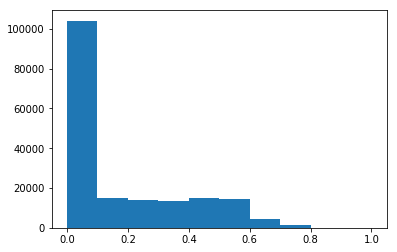

In [3]:
import matplotlib.pyplot as plt
plt.hist(data.kwh, bins=10)
plt.show()

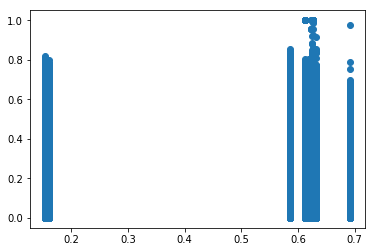

In [4]:
plt.plot(data.lon, data.kwh, 'o')
plt.show()

In [5]:
data.data.head(10)

0    1/2/2012 2:00
1    1/2/2012 2:00
2    1/2/2012 2:00
3    1/2/2012 2:00
4    1/2/2012 2:00
5    1/2/2012 2:00
6    1/2/2012 2:00
7    1/2/2012 2:00
8    1/2/2012 2:00
9    1/2/2012 2:00
Name: data, dtype: object

In [6]:
from datetime import datetime

def convertToHour(record):
    datetime_object = datetime.strptime(record, '%m/%d/%Y %H:%M')
    return datetime_object.hour

hours = data.data.apply(convertToHour)


def convertToMonth(record):
    datetime_object = datetime.strptime(record, '%m/%d/%Y %H:%M')
    return datetime_object.month

months = data.data.apply(convertToMonth)

def convertToDayOfYear(record):
    datetime_object = datetime.strptime(record, '%m/%d/%Y %H:%M')
    new_year_day = pd.Timestamp(year=datetime_object.year, month=1, day=1)
    return (datetime_object - new_year_day).days + 1

day_of_year = data.data.apply(convertToDayOfYear)

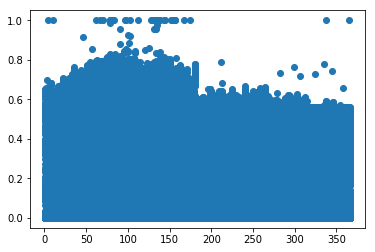

In [7]:
plt.plot(day_of_year, data.kwh, 'o')
plt.show()

In [8]:
data["hour"] = hours/24
data["month"] = months/12
data["day_of_year"] = day_of_year/365

In [9]:
data.head(10)

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod,kwh,hour,month,day_of_year
0,97595,0.425,0.083,0.083,0.437,0.631,1.000,2012,0.003,0.0,...,0.828,0.562,0.485,0.612,0.0,0.189,0.0,0.083333,0.083333,0.005479
1,97606,0.250,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.990,0.841,0.606,0.616,0.0,0.200,0.0,0.083333,0.083333,0.005479
2,97637,0.350,0.375,0.000,0.439,0.626,0.000,2012,0.003,0.0,...,0.884,0.597,0.539,0.614,0.0,0.158,0.0,0.083333,0.083333,0.005479
3,97646,0.325,0.292,0.167,0.440,0.612,0.250,2012,0.003,0.0,...,0.787,1.000,0.432,0.620,0.0,0.204,0.0,0.083333,0.083333,0.005479
4,97772,0.000,0.000,0.333,0.436,0.626,0.719,2012,0.003,0.0,...,0.748,0.614,0.473,0.614,0.0,0.199,0.0,0.083333,0.083333,0.005479
5,104492,0.375,0.417,0.000,0.552,0.154,0.125,2012,0.003,0.0,...,0.748,0.614,0.473,1.000,0.0,0.198,0.0,0.083333,0.083333,0.005479
6,104528,0.400,0.458,0.000,0.553,0.160,0.125,2012,0.003,0.0,...,0.748,0.614,0.473,0.150,0.0,0.198,0.0,0.083333,0.083333,0.005479
7,104601,0.125,0.167,0.167,0.415,0.691,0.000,2012,0.003,0.0,...,0.748,0.614,0.473,0.570,0.0,0.158,0.0,0.083333,0.083333,0.005479
8,104637,0.225,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.760,0.890,0.424,0.616,0.0,0.199,0.0,0.083333,0.083333,0.005479
9,169235,0.075,0.083,0.083,0.437,0.624,1.000,2012,0.003,0.0,...,0.796,0.291,1.000,0.614,0.0,0.201,0.0,0.083333,0.083333,0.005479


In [10]:
data.columns.values

array(['id', 'idsito', 'idmodel', 'idbrand', 'lat', 'lon', 'ageinmonths',
       'anno', 'day', 'ora', 'data', 'temperatura_ambiente',
       'irradiamento', 'pressure', 'windspeed', 'humidity', 'icon',
       'dewpoint', 'windbearing', 'cloudcover', 'tempi', 'irri',
       'pressurei', 'windspeedi', 'humidityi', 'dewpointi',
       'windbearingi', 'cloudcoveri', 'dist', 'altitude', 'azimuth',
       'altitudei', 'azimuthi', 'pcnm1', 'pcnm2', 'pcnm3', 'pcnm4',
       'pcnm5', 'pcnm6', 'pcnm7', 'pcnm8', 'pcnm9', 'pcnm10', 'pcnm11',
       'pcnm12', 'pcnm13', 'pcnm14', 'pcnm15', 'irr_pvgis_mod',
       'irri_pvgis_mod', 'kwh', 'hour', 'month', 'day_of_year'],
      dtype=object)

In [11]:
data.dtypes

id                        int64
idsito                  float64
idmodel                 float64
idbrand                 float64
lat                     float64
lon                     float64
ageinmonths             float64
anno                      int64
day                     float64
ora                     float64
data                     object
temperatura_ambiente    float64
irradiamento            float64
pressure                float64
windspeed               float64
humidity                float64
icon                    float64
dewpoint                float64
windbearing             float64
cloudcover              float64
tempi                   float64
irri                    float64
pressurei               float64
windspeedi              float64
humidityi               float64
dewpointi               float64
windbearingi            float64
cloudcoveri             float64
dist                    float64
altitude                float64
azimuth                 float64
altitude

In [12]:
data.isnull().values.any() #no nans

False

In [13]:
data.describe()

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod,kwh,hour,month,day_of_year
count,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,...,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000
mean,154061.584368,0.212504,0.239457,0.152576,0.448749,0.574158,0.301208,2012.350705,0.415888,0.489254,...,0.758798,0.645844,0.488550,0.572263,0.180267,0.199450,0.167387,0.450274,0.473575,0.432233
std,77880.280535,0.131447,0.169260,0.116226,0.037412,0.149998,0.375275,0.477192,0.269510,0.303695,...,0.228070,0.202587,0.181275,0.200393,0.223757,0.057927,0.208760,0.227819,0.280558,0.282350
min,1.000000,0.000000,0.000000,0.000000,0.415000,0.154000,0.000000,2012.000000,0.000000,0.000000,...,0.000000,0.137000,0.000000,0.000000,0.000000,-0.025000,0.000000,0.083333,0.083333,0.002740
25%,104972.500000,0.100000,0.167000,0.083000,0.437000,0.620000,0.000000,2012.000000,0.195000,0.222000,...,0.748000,0.614000,0.432000,0.612000,0.000000,0.158000,0.000000,0.250000,0.250000,0.194521
50%,160724.000000,0.225000,0.208000,0.167000,0.437000,0.624000,0.125000,2012.000000,0.386000,0.500000,...,0.760000,0.614000,0.473000,0.614000,0.059000,0.196000,0.049000,0.458333,0.416667,0.389041
75%,218611.500000,0.325000,0.292000,0.167000,0.439000,0.630000,0.719000,2013.000000,0.592000,0.778000,...,0.884000,0.738000,0.530000,0.615000,0.332000,0.216000,0.331000,0.666667,0.666667,0.660274
max,276488.000000,0.425000,0.750000,0.417000,0.553000,0.691000,1.000000,2013.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.006000,1.000000,0.833333,1.000000,1.002740


In [14]:
from sklearn import datasets
import sklearn.model_selection as skms
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Uwaga! X i y muszą mieć wyłącznie wartości liczbowe!
X = data.drop(columns=['kwh', 'data', 'id'])
y = data.kwh
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
X.dtypes

idsito                  float64
idmodel                 float64
idbrand                 float64
lat                     float64
lon                     float64
ageinmonths             float64
anno                      int64
day                     float64
ora                     float64
temperatura_ambiente    float64
irradiamento            float64
pressure                float64
windspeed               float64
humidity                float64
icon                    float64
dewpoint                float64
windbearing             float64
cloudcover              float64
tempi                   float64
irri                    float64
pressurei               float64
windspeedi              float64
humidityi               float64
dewpointi               float64
windbearingi            float64
cloudcoveri             float64
dist                    float64
altitude                float64
azimuth                 float64
altitudei               float64
azimuthi                float64
pcnm1   

In [16]:
y.dtypes

dtype('float64')

In [17]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

#X_train, X_test, y_train, y_test

Coefficients: 
 [-8.67239734e+09 -4.93164888e+11 -2.36559845e+11 -2.10596984e+11
 -2.33715672e+11 -9.87063278e+08  2.77092457e-02  1.82130694e-01
 -5.50698936e+00 -2.29034424e-02  7.54089355e-01 -4.69970703e-03
 -1.53830051e-02 -1.35025024e-01  1.16271973e-02  6.38351440e-02
 -6.20651245e-03 -5.85212708e-02  1.12991333e-02  4.88224030e-01
 -1.29649639e-02 -6.06004000e-02  4.95204926e-02 -5.33642769e-02
 -1.10387802e-03 -1.84044838e-02  9.82360840e-02  8.18328857e-02
 -3.57170105e-02 -7.37304688e-02 -2.99377441e-02  2.21001236e+10
 -1.48667192e+11 -8.84550367e+10  5.03776360e+10 -1.61798330e+11
 -3.29471967e+10 -8.16561428e+10 -5.87556644e+10 -1.59878788e+10
  7.28506158e+10 -1.24847309e+11  1.20331163e+11  2.11610682e+11
 -1.88055597e+11 -5.17514239e+10  3.09432983e-01 -1.08501434e-01
  7.29136658e+00  3.20434570e-03 -1.55639648e-01]
Mean squared error: 0.09
Variance score: 0.81


In [18]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(random_state=0, n_estimators=20)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred_rf)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_rf))

E:\Users\wilcz\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Mean squared error: 0.05
Variance score: 0.95


In [22]:
from sklearn.svm import SVR
import numpy as np
np.random.seed(0)

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = rforest.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred_svr )))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_svr ))

Mean squared error: 0.05
Variance score: 0.95


In [23]:
test = pd.read_csv("test.csv")
test['hours'] = test.data.apply(convertToHour)/24
test['month'] = test.data.apply(convertToMonth)/12
test['day_of_year'] = test.data.apply(convertToDayOfYear)/365
test_X = test.drop(columns=['data', 'id'])
test_id = test.id
test_Y = svr.predict(test_X)
d = {'Id': test_id, 'Predicted': test_Y}
df = pd.DataFrame(data=d)
df.Predicted.clip_lower(0, inplace = True)

In [20]:
df.to_csv('result.csv',index = False)